# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откроем файл с данными и изучим общую информацию. 

**Импортируем необходимые библиотеки (`pandas`, `matplotlib` и другие). Считаем данные из csv-файла и сохраним в переменную `data`:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    
    data = pd.read_csv('real_estate_data.csv', sep='\t')

Скопируем датасет для проверки на сколько уменьшились данные.

In [3]:
data_start = len(data)

**Выведем основную информацию о датафрейме с помощью методов `info()` и `describe()`:**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
round(data.describe(), 1)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,9.9,6541548.8,60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,28793.7,14191.3,0.6,490.8,0.8,518.0,180.9
std,5.7,10887013.3,35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,12630.9,8608.4,0.8,342.3,0.9,277.7,219.7
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,26726.0,13098.5,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


**Выведем первые 20 строчек датафрейма `data` на экран:**

In [6]:
pd.set_option('display.max_columns', 50) #выведем все столбцы без сжатия
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведем гистограммы на экран для первичной оценки данных:**

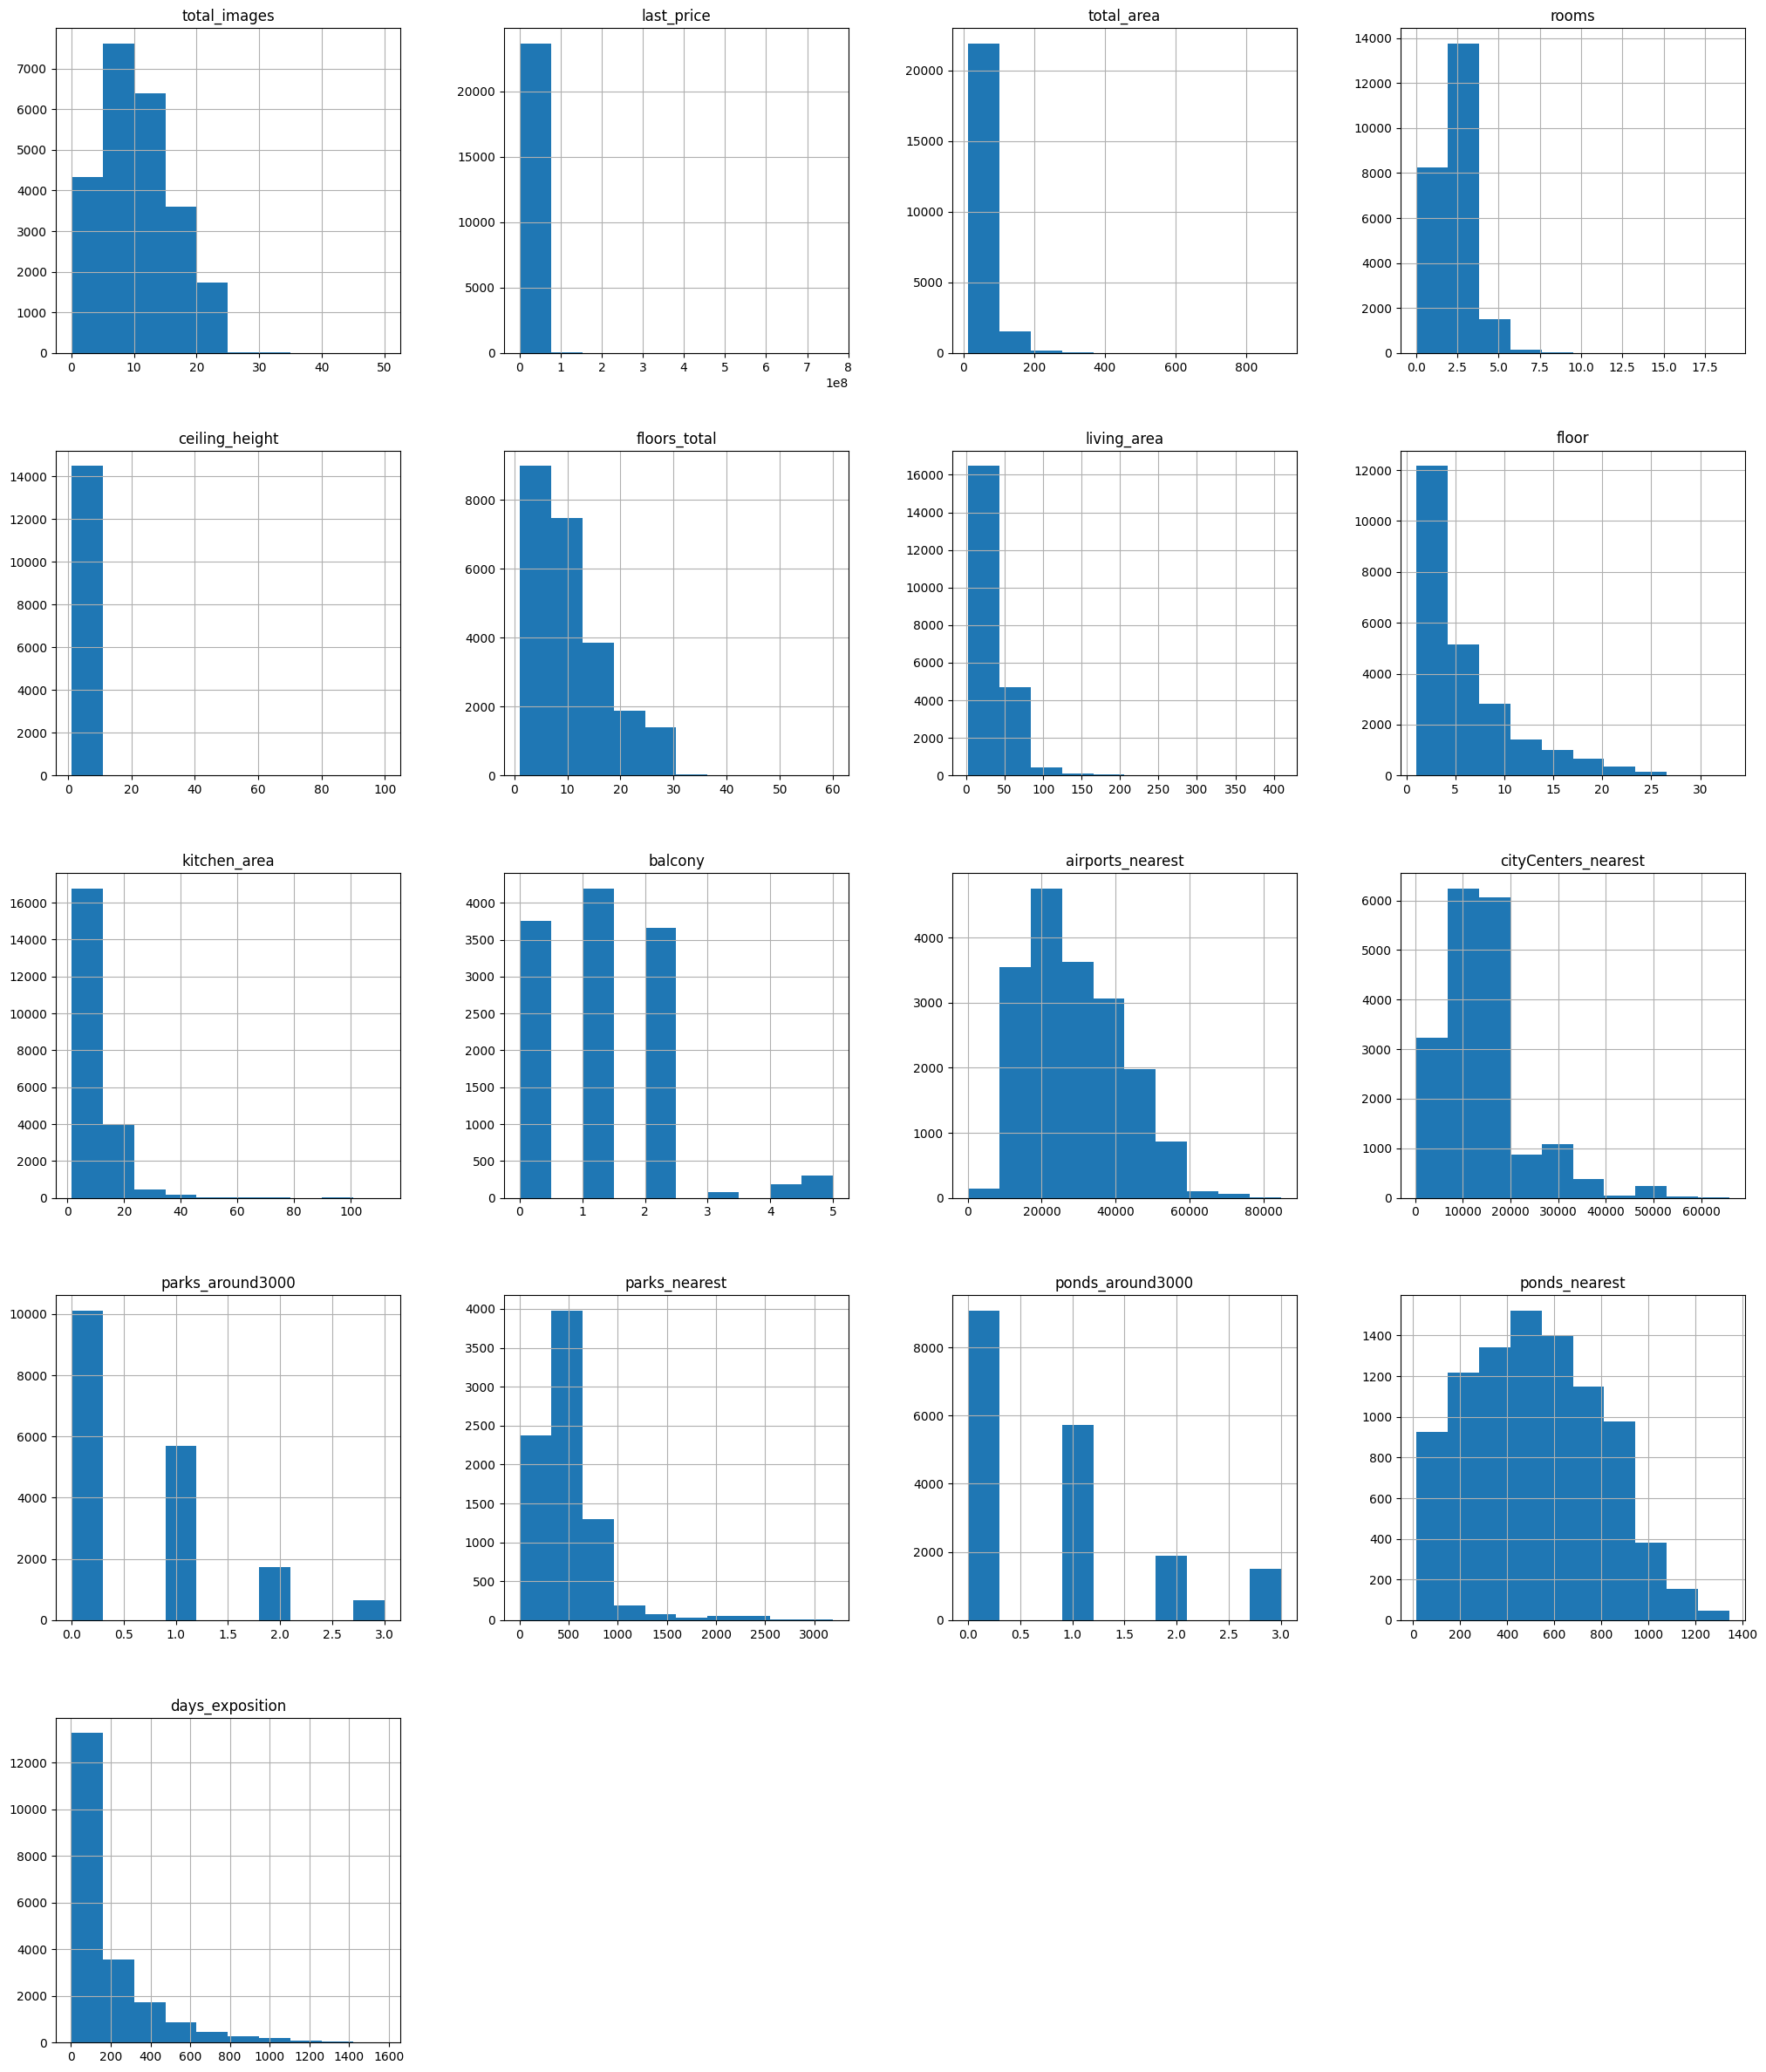

In [7]:
data.hist(figsize=(25, 30));

База данных имеет 23699 запись. Заголовки оформлены однотипно, понятно и придерживаются `snake_case`. Имеются несоответствия между типом данных столбца и хранящимся там данными. Имеется 14 (четырнадцать) столбцов с отсутствующими данными. Каждая запись (строка) описывается 22 признаками (17 количественных, 4 категориальных и 1 временной).

*Первичные комментарии по столбцам:*

1. `first_day_exposition` - имеет тип *object* вместо *datetime*;
1. `ceiling_height` - имеет отсутствующие значения;
1. `floors_total` - имеет тип *float*, должен быть тип *int* (количество этажей это целое значение), имеет отсутствующие значения;
1. `is_apartment` - имеет тип *object* вместо *bool*, имеет отсутствующие значения;
1. `living_area` - имеет отсутствующие значения;
1. `kitchen_area` - имеет отсутствующие значения;
1. `balcony` - имеет отсутствующие значения;
1. `locality_name` - имеет отсутствующие значения;
1. `airports_nearest` - имеет отсутствующие значения;
1. `cityCenters_nearest` - имеет отсутствующие значения;
1. `parks_around3000` - имеет тип *float*, должен быть тип *int* (количество парков в пределах 3000 метров это целое значение), имеет отсутствующие значения;
1. `parks_nearest` - имеет отсутствующие значения;
1. `ponds_around3000` - имеет тип *float*, должен быть тип *int* (количество водоемов в пределах 3000 метров это целое значение), имеет отсутствующие значения;
1. `ponds_nearest` - имеет нулевые значения;
1. `days_exposition` - имеет тип *float*, должен быть тип *int* (количество дней это целое значение), имеет отсутствующие значения.

## Предобработка данных

**Выведем количество пропущенных значений для каждого столбца:**

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверим данные на дубликаты:

In [9]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено, пройдемся по каждому столбцу.

### Число фотографий квартиры в объявлении `total_images`

In [10]:
data['total_images'].value_counts()

total_images
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: count, dtype: int64

Отсутствующих значений и аномалий не обнаружено.

### Цена на момент снятия с публикации `last_price`

In [11]:
data['last_price'].value_counts()

last_price
4500000.0     342
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: count, Length: 2978, dtype: int64

Изменим тип данных на *int* для упрощения восприятия:

In [12]:
data['last_price'] = data['last_price'].astype('int')

Проверим данные на предмат аномалий:

In [13]:
data['last_price'].sort_values(ascending=False).unique()

array([763000000, 420000000, 401300000, ...,    440000,    430000,
           12190])

Имеются слишком высокие значения до 763 млн. руб и слишком низкие - 12190 руб. Рассмотрим их подробнее:

In [14]:
data.loc[data['last_price'] > 60000000].sort_values('last_price').head(20)
# выведем квартиры дороже 60 млн. руб

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8355,9,60309900,200.0,2016-02-20T00:00:00,4,NaN,5.0,126.00,2,False,False,False,26.00,0.0,Санкт-Петербург,22583.0,3849.0,0.0,NaN,1.0,803.0,348.0
7618,20,60999000,205.0,2016-02-04T00:00:00,4,4.0,6.0,112.00,3,NaN,False,False,22.00,1.0,Санкт-Петербург,24703.0,2378.0,3.0,318.0,3.0,397.0,907.0
1706,10,62171920,200.3,2018-05-19T00:00:00,3,NaN,16.0,101.00,11,NaN,False,False,32.10,NaN,Санкт-Петербург,31887.0,4979.0,0.0,NaN,2.0,182.0,NaN
15502,7,62316000,173.1,2017-10-14T00:00:00,4,NaN,16.0,NaN,15,NaN,False,False,NaN,NaN,Санкт-Петербург,33313.0,4600.0,1.0,75.0,0.0,NaN,520.0
19151,9,63900000,140.8,2017-07-13T00:00:00,3,3.3,6.0,74.30,4,NaN,False,False,20.00,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,103.0
8038,20,64500000,300.0,2017-09-29T00:00:00,6,NaN,5.0,150.00,5,NaN,False,False,20.00,NaN,Санкт-Петербург,24825.0,5509.0,0.0,NaN,0.0,NaN,468.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
23574,14,64990000,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.00,8,NaN,False,False,16.00,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
581,20,65000000,365.0,2019-03-18T00:00:00,7,2.9,7.0,NaN,7,NaN,False,False,NaN,NaN,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
7663,15,65000000,180.0,2016-03-22T00:00:00,4,3.1,9.0,NaN,5,False,False,False,NaN,0.0,Санкт-Петербург,26231.0,5833.0,2.0,112.0,0.0,NaN,90.0


Посчитаем сколько всего таких значений:

In [15]:
data['last_price'].loc[data['last_price'] > 60000000].count()

101

In [16]:
print('Таких значений немного, они составляют {:.1%}'
      .format(data['last_price'].loc[data['last_price'] > 60000000].count() / data_start, 2)
     + ' от общего объема данных.')

Таких значений немного, они составляют 0.4% от общего объема данных.


Удалим эти значение.

In [17]:
data = data.drop(index=data.index[data['last_price'] > 60000000], axis=0).reset_index(drop=True)

In [18]:
data[data['last_price'] < 500000].sort_values('last_price')
# выведем квартиры дешевле 500000

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8750,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
14847,5,430000,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
17378,7,430000,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16203,18,440000,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
5674,7,450000,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,False,False,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
9537,7,450000,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,False,False,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
16149,14,450000,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17598,0,450000,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,False,False,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
18788,1,470000,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,False,False,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0
21820,0,470000,37.0,2018-02-18T00:00:00,1,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Только одно значение выбивается из общей картины - лот со стоимостью в 12190 руб. Удалим его.

In [19]:
data = data.drop(index=data.index[data['last_price'] < 50000], axis=0).reset_index(drop=True)

Изменили тип столбца на *int*. Отсутствующих значений не обнаружено. Удалили лот с аномально низкой ценой и квартиры со стоимостью выше 60 млн. руб. Они больше являются исключением на рынке недвижимости, чем нормой, поэтому исключим их, чтобы не влияли на анализ. 

### Общая площадь квартиры в квадратных метрах (м²) `total_area`

In [20]:
data['total_area'].value_counts()

total_area
45.00    419
42.00    383
60.00    347
31.00    346
44.00    345
        ... 
90.02      1
32.72      1
53.52      1
96.28      1
76.75      1
Name: count, Length: 2130, dtype: int64

Проверим данные на предмат аномалий:

In [21]:
data['total_area'].sort_values(ascending=False).unique()

array([517. , 494.1, 483.9, ...,  13.2,  13. ,  12. ])

Имеются слишком высокие значения до 900 м² и слишком низкие - 12 м². Рассмотрим их подробнее:

In [22]:
data[data['total_area'] > 160].sort_values('total_area')
# выведем квартиры общей площадью больше 160 м²

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15273,19,36750000,160.2,2017-11-08T00:00:00,6,NaN,5.0,90.0,3,NaN,False,False,20.3,NaN,Санкт-Петербург,20466.0,3686.0,1.0,349.0,1.0,484.0,68.0
10670,13,20900000,160.4,2019-02-28T00:00:00,5,2.80,12.0,90.6,7,NaN,False,False,22.3,NaN,Санкт-Петербург,16619.0,15159.0,1.0,893.0,0.0,NaN,NaN
4779,20,17000000,160.6,2016-05-12T00:00:00,4,3.52,5.0,111.1,3,NaN,False,False,12.8,0.0,Санкт-Петербург,23650.0,1754.0,3.0,449.0,2.0,414.0,315.0
5635,2,11067416,160.7,2018-08-01T00:00:00,2,3.00,2.0,NaN,1,NaN,False,False,NaN,NaN,посёлок Репино,61451.0,42550.0,0.0,NaN,0.0,NaN,238.0
11617,2,15276000,160.8,2018-07-01T00:00:00,3,3.00,4.0,100.4,3,NaN,False,False,29.9,2.0,Санкт-Петербург,53674.0,18167.0,0.0,NaN,2.0,189.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20185,12,20000000,460.8,2019-03-20T00:00:00,6,3.10,3.0,279.6,1,NaN,False,False,55.5,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
6194,8,34000000,470.3,2018-01-14T00:00:00,4,NaN,3.0,248.7,3,NaN,False,False,40.0,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
654,3,49950000,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,False,False,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
9781,1,43185328,494.1,2017-05-12T00:00:00,1,2.85,12.0,NaN,3,NaN,False,False,NaN,0.0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0


360 квартир с общей площадью больше 160 м². Как и в случае с ценой посмотрим сколько это в процентном соотношении к общему объему данных:

In [23]:
print('Они составляют {:.1%}'
      .format(data['total_area'].loc[data['total_area'] > 160].count() / data_start, 2)
     + ' от общего объема данных.')

Они составляют 1.6% от общего объема данных.


Удалим эти значение.

In [24]:
data = data.drop(index=data.index[data['total_area'] > 160], axis=0).reset_index(drop=True)

In [25]:
data[data['total_area'] < 20].sort_values('total_area')
# выведем помещения общей площадью меньше 20 м²

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19510,4,2400000,12.00,2017-07-19T00:00:00,1,2.55,5.0,10.00,2,NaN,False,False,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
19414,0,3800000,13.00,2018-07-04T00:00:00,1,NaN,5.0,10.00,3,NaN,False,False,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19153,3,1850000,13.00,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,False,False,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
17595,3,1400000,13.00,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19165,2,1686000,13.20,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19249,5,1190000,14.00,2018-07-29T00:00:00,1,NaN,5.0,11.00,1,NaN,False,False,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
11790,5,1900000,15.00,2018-06-27T00:00:00,1,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16602,9,1550000,15.00,2018-08-21T00:00:00,1,2.70,9.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0
8697,10,2450000,15.50,2018-08-22T00:00:00,0,NaN,5.0,10.00,2,NaN,True,False,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9217,5,2100000,16.00,2017-12-10T00:00:00,0,NaN,6.0,13.00,1,NaN,False,True,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


Данные помещения больше похожи на хрущевки. Не будем их трогать.

Отсутствующих значений не обнаружено. Удалили выбивающиеся значения более 160 м², чтобы исключить дальнейшее влияние на анализ.

### Дата публикации `first_day_exposition`

In [26]:
data['first_day_exposition'].value_counts()

first_day_exposition
2018-02-01T00:00:00    362
2017-11-10T00:00:00    236
2017-10-13T00:00:00    123
2017-09-27T00:00:00    105
2018-03-26T00:00:00     93
                      ... 
2016-08-26T00:00:00      1
2016-07-22T00:00:00      1
2016-12-30T00:00:00      1
2014-12-23T00:00:00      1
2015-07-19T00:00:00      1
Name: count, Length: 1488, dtype: int64

Переведем столбец в формат *datetime*. Отметим, что везде не указанно точное время, поэтому отбросим его

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format = '%Y-%m-%dT%H:%M:%S')

Изменили тип столбца на *datetime*. Отсутствующих значений и аномалий не обнаружено.

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


### Число комнат `rooms`

In [29]:
data['rooms'].value_counts()

rooms
1    8044
2    7934
3    5744
4    1064
5     202
0     196
6      34
7      10
8       1
Name: count, dtype: int64

Имеется 196 объявлений с количеством комнат *0*. Квартиру-студию могут указать с таким количеством комнат. Проверим:

In [30]:
data.loc[(data['rooms'] == 0) & (data['studio']  == True)].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8697,10,2450000,15.5,2018-08-22,0,NaN,5.0,10.0,2,NaN,True,False,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
695,5,1500000,17.0,2017-06-07,0,2.70,9.0,12.0,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
12726,8,1900000,18.0,2019-01-25,0,2.60,5.0,16.0,3,NaN,True,False,NaN,NaN,Санкт-Петербург,19573.0,15772.0,2.0,149.0,2.0,496.0,10.0
8569,1,1350000,18.8,2017-11-22,0,2.75,19.0,15.8,1,NaN,True,False,NaN,NaN,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
9610,8,2190000,19.0,2018-10-12,0,3.50,5.0,15.0,1,NaN,True,False,NaN,NaN,Санкт-Петербург,29561.0,8264.0,2.0,383.0,1.0,781.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,20,5050000,44.2,2017-09-14,0,2.70,9.0,32.2,1,NaN,True,False,NaN,NaN,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
13333,16,8100000,58.4,2019-04-26,0,3.30,7.0,33.0,6,NaN,True,False,NaN,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
20805,0,8200000,71.0,2017-07-21,0,5.80,5.0,68.0,5,NaN,True,False,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
3374,6,7400000,73.6,2017-05-18,0,NaN,3.0,50.0,1,NaN,True,False,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0


Под данный критерий попадет 138 объявлений. Оставим без изменений. Остальные строки попробуем изменить. Двухкомнатные кватриры имеют площадь от 40м². Все что ниже поменяем на *1*. Остальные значения будем считать как аномальные и удалим их.

In [31]:
data.loc[(data['rooms'] == 0) & (data['total_area'] < 40) & (data['studio']  == False), 'rooms'] = 1

In [32]:
data['rooms'].value_counts()

rooms
1    8101
2    7934
3    5744
4    1064
5     202
0     139
6      34
7      10
8       1
Name: count, dtype: int64

Осталось 139 квартир с количеством комнат *0*. Студий было 138. Проверим аномалии:

In [33]:
data.loc[(data['rooms'] == 0) & (data['studio']  == False)].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7086,8,2999000,42.63,2017-11-27,0,NaN,16.0,25.7,2,NaN,False,True,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Оставим без изменений.

In [34]:
data[data['rooms'] > 5].sort_values('rooms')
# выведем квартиры с количеством комнат больше 5

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
49,20,11795000,136.0,2017-09-22,6,3.00,2.0,94.0,2,NaN,False,False,11.0,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
12811,4,23000000,150.0,2019-02-11,6,3.00,5.0,99.0,2,False,False,False,18.0,NaN,Санкт-Петербург,22149.0,3959.0,0.0,NaN,0.0,NaN,NaN
22634,13,12500000,155.8,2019-03-21,6,3.20,5.0,108.8,4,NaN,False,False,15.3,NaN,Санкт-Петербург,20414.0,4769.0,1.0,444.0,2.0,429.0,NaN
13972,13,14000000,94.0,2019-01-23,6,2.65,NaN,51.0,23,NaN,False,False,16.3,NaN,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN
14213,3,6864000,95.0,2018-10-12,6,2.50,15.0,75.0,3,NaN,False,False,13.0,NaN,Санкт-Петербург,15874.0,10680.0,0.0,NaN,2.0,575.0,12.0
14349,11,12990000,106.0,2018-07-08,6,NaN,4.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,20417.0,3655.0,0.0,NaN,1.0,361.0,90.0
14395,19,16500000,156.0,2019-01-23,6,3.47,4.0,115.0,3,NaN,False,False,14.0,NaN,Санкт-Петербург,26109.0,4811.0,3.0,220.0,1.0,595.0,90.0
16925,12,13500000,156.6,2016-05-26,6,3.60,7.0,114.8,2,NaN,False,False,11.5,0.0,Санкт-Петербург,23164.0,2705.0,1.0,573.0,0.0,NaN,451.0
12547,9,20000000,128.0,2019-04-04,6,3.56,5.0,85.3,3,NaN,False,False,15.2,NaN,Санкт-Петербург,23974.0,4542.0,1.0,526.0,1.0,935.0,NaN
17175,6,21000000,154.0,2018-12-18,6,3.51,5.0,99.1,1,NaN,False,False,24.7,NaN,Санкт-Петербург,20215.0,1658.0,3.0,328.0,3.0,132.0,116.0


In [35]:
data['rooms'][data['rooms'] > 5].count()

45

45 квартир с количеством комнат больше 5, но не больше 8. Оставим без изменений.

Отсутствующих значений не обнаружено. Некоторые квартиры имели количество комнат *0*.

### Высота потолков `ceiling_height`

Выведем уникальные значения на предмет аномалий:

In [36]:
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   5.8 ,   5.5 ,   5.3 ,
         5.  ,   4.8 ,   4.7 ,   4.5 ,   4.4 ,   4.37,   4.3 ,   4.25,
         4.2 ,   4.19,   4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,
         3.95,   3.93,   3.9 ,   3.88,   3.85,   3.84,   3.83,   3.8 ,
         3.78,   3.75,   3.7 ,   3.68,   3.67,   3.66,   3.65,   3.63,
         3.62,   3.6 ,   3.59,   3.57,   3.56,   3.55,   3.54,   3.53,
         3.52,   3.51,   3.5 ,   3.49,   3.48,   3.47,   3.46,   3.45,
         3.44,   3.42,   3.4 ,   3.39,   3.38,   3.37,   3.36,   3.35,
         3.34,   3.33,   3.32,   3.31,   3.3 ,   3.29,   3.28,   3.27,
         3.26,   3.25,   3.24,   3.23,   3.22,   3.21,   3.2 ,   3.18,
         3.17,   3.16,   3.15,   3.14,   3.13,   3.12,   3.11,   3.1 ,
         3.09,   3.08,   3.07,   3.06,   3.05,   3.04,   3.03,   3.02,
         3.01,   3.  ,   2.99,   2.98,   2.97,   2.96,   2.95,   2.94,
      

Допустим, что существуют уникальные помещения с высотой полотков до 4 метров. Выведем значения более 4 и менее 2 метров:

In [37]:
data.query('ceiling_height > 4 or ceiling_height < 2').sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22141,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5586,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16587,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
1097,20,6695000,36.9,2018-09-28,1,4.06,5.0,22.0,2,NaN,False,False,7.20,NaN,Санкт-Петербург,21725.0,2990.0,1.0,596.0,1.0,866.0,110.0
4787,4,8600000,93.0,2015-11-20,4,4.10,5.0,NaN,4,False,False,False,NaN,0.0,Санкт-Петербург,24171.0,4434.0,1.0,518.0,0.0,NaN,260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22481,14,4000000,98.0,2018-03-15,4,27.00,2.0,73.0,2,True,False,False,9.00,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
20953,19,4900000,42.0,2017-04-18,1,27.50,24.0,37.7,19,False,False,False,11.00,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
3072,14,2900000,75.0,2018-11-12,3,32.00,3.0,53.0,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21891,19,9999000,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,False,False,16.50,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN


В значениях от 20 метров явно наблюдается ошибка при заполнении. Данные значения необходимо разделить на 10.

In [38]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)

Проверим изменения:

In [39]:
data.query('ceiling_height > 4 or ceiling_height < 2').sort_values('ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22141,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,False,False,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5586,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16587,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
1097,20,6695000,36.9,2018-09-28,1,4.06,5.0,22.0,2,NaN,False,False,7.20,NaN,Санкт-Петербург,21725.0,2990.0,1.0,596.0,1.0,866.0,110.0
5995,13,40000000,65.3,2017-07-13,2,4.10,5.0,45.0,2,NaN,False,False,12.00,2.0,Санкт-Петербург,23308.0,2380.0,1.0,473.0,1.0,283.0,497.0
11004,19,9998000,65.6,2017-08-15,2,4.10,4.0,33.0,3,NaN,False,False,9.00,NaN,Санкт-Петербург,24437.0,4269.0,0.0,NaN,1.0,682.0,589.0
4787,4,8600000,93.0,2015-11-20,4,4.10,5.0,NaN,4,False,False,False,NaN,0.0,Санкт-Петербург,24171.0,4434.0,1.0,518.0,0.0,NaN,260.0
15251,7,15000000,117.3,2017-11-10,3,4.14,4.0,NaN,4,NaN,False,False,NaN,NaN,Санкт-Петербург,25126.0,3674.0,1.0,571.0,3.0,787.0,126.0
149,1,8200000,80.0,2018-11-06,3,4.15,3.0,44.2,2,NaN,False,False,12.20,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
2929,11,4450000,36.0,2017-12-12,1,4.19,5.0,18.0,1,NaN,False,False,8.00,NaN,Санкт-Петербург,24689.0,4256.0,1.0,1077.0,3.0,690.0,78.0


Удалим указанные выше аномальные значений:

In [40]:
data = data.drop(index=data.index[(data['ceiling_height'] > 4) | (data['ceiling_height'] < 2)], 
                 axis=0).reset_index(drop=True)

Посмотрим числовое описание данных:

In [41]:
data['ceiling_height'].describe()

count    14144.000000
mean         2.710519
std          0.245766
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

Стандартное отклонение составляет 0.245766. Среднее значение - 2.710519. Медиана - 2.650000.

In [42]:
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians. head(40)

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,204
3.0,2.76,375
4.0,3.00,754
5.0,2.55,3580
6.0,3.00,552
7.0,2.95,368
8.0,2.80,200
9.0,2.55,2543


Проверили медиану потолков в соотношении количества этажей в здании.

Заменим значения высоты потолков на общую медиану для отсутствующих значений этажности дома:

In [43]:
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) | 
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = data['ceiling_height'].describe()[5]

Медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности:

In [44]:
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

Посчитаем количество пропущенных значений после проделанной замены:

In [45]:
data['ceiling_height'].isna().value_counts()

ceiling_height
False    23187
Name: count, dtype: int64

Выявили аномальные значения, часть удалось заменить, часть пришлось удалить. Заменили отсутствующие значения на медиану с акцентированием на этажность зданий.

### Всего этажей в доме `floors_total`

In [46]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
179,12,11640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
230,4,2438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
448,4,9788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
651,4,6051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1709,5,3600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,5,8500000,63.5,2017-05-24,2,2.65,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22165,4,4574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22314,0,14569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23078,0,21187872,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Заменить отсутствующие значения не представляется возможным, удалим их:

In [47]:
data.dropna(subset=['floors_total'], inplace=True)

Приводим этажность к целочисленному типу

In [48]:
data['floors_total'] = data['floors_total'].astype(int)

Удалили отсутствующие значения и изменили тип данных на `int`.

### Жилая площадь `living_area`

Посмотрим числовое описание данных:

In [49]:
data['living_area'].describe()

count    21287.000000
mean        32.553724
std         15.864479
min          2.000000
25%         18.500000
50%         30.000000
75%         41.900000
max        128.000000
Name: living_area, dtype: float64

Для пропущенных значений возьмем медиану по `living_area` и разделим на медиану `total_area`. Так мы выясним медиану соотношения жилой площади к всей площади помещения. Полученное значение мы умножим на `total_area` каждого отсутствующего значения:

In [50]:
data['living_area'].fillna(round((data['living_area'].median() / data['total_area'].median()) 
                           * data['total_area'], 1), inplace=True)

In [51]:
data['living_area'].isna().value_counts()

living_area
False    23102
Name: count, dtype: int64

### Этаж `floor`

In [52]:
data['floor'].value_counts()

floor
2     3287
3     2986
1     2882
4     2702
5     2550
6     1263
7     1176
8     1059
9     1038
10     673
12     513
11     512
13     375
15     335
14     332
16     308
17     222
18     171
19     137
21     120
22     112
20     108
23      99
24      60
25      43
26      23
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: count, dtype: int64

Отсутствующих значений и аномалий не обнаружено.

### Апартаменты (булев тип) `is_apartment`

In [53]:
data['is_apartment'].value_counts()

is_apartment
False    2672
True       45
Name: count, dtype: int64

Все пропущенные значения заменим на False

In [54]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [55]:
data['is_apartment'].isna().value_counts()

is_apartment
False    23102
Name: count, dtype: int64

### Квартира-студия (булев тип) `studio`

In [56]:
data['studio'].value_counts()

studio
False    22957
True       145
Name: count, dtype: int64

In [57]:
data['studio'].isna().value_counts()

studio
False    23102
Name: count, dtype: int64

Отсутствующих значений и аномалий не обнаружено.

### Свободная планировка (булев тип) `open_plan`

In [58]:
data['open_plan'].value_counts()

open_plan
False    23036
True        66
Name: count, dtype: int64

In [59]:
data['open_plan'].isna().value_counts()

open_plan
False    23102
Name: count, dtype: int64

Отсутствующих значений и аномалий не обнаружено.

### Площадь кухни в квадратных метрах (м²) `kitchen_area`

In [60]:
data['kitchen_area'].describe()

count    20931.000000
mean        10.238755
std          5.027816
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         75.000000
Name: kitchen_area, dtype: float64

С площадью кухны поступим точно также как и с `living_area`

In [61]:
data['kitchen_area'].fillna(round((data['kitchen_area'].median() / data['total_area'].median()) 
                           * data['total_area'], 1), inplace=True)

In [62]:
data['kitchen_area'].isna().value_counts()

kitchen_area
False    23102
Name: count, dtype: int64

### Число балконов `balcony`

In [63]:
data['balcony'].isna().value_counts()

balcony
False    11908
True     11194
Name: count, dtype: int64

Количество балконов изменим на тип `int`. Заменяем пропущенные значения на 0:

In [64]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

### Название населённого пункта `locality_name`

In [65]:
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15178
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           397
Пушкин                               361
                                   ...  
деревня Пельгора                       1
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
посёлок Дзержинского                   1
Name: count, Length: 363, dtype: int64

In [66]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Удаляем строки с отсутствующими данными: 

In [67]:
data.dropna(subset=['locality_name'], inplace=True)

Возможны рассхождения в названиях населенного пункта из-за наличия или отсутствия буквы *ё* в слове *поселок*. Создадим для этого функцию:

In [68]:
def locality_name_replace(row):
    try:
        locality_name = row['locality_name'].split()
        if 'посёлок' in locality_name:
            index = locality_name.index('посёлок')
            locality_name[index] = 'поселок'
        result = ' '.join(locality_name)
        return result
    except:
        pass

In [69]:
data['locality_name'] = data.apply(locality_name_replace, axis=1)

In [70]:
data['locality_name'].str.lower().sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок лесогорский', 'городской поселок мга',
       'городской поселок назия', 'городской поселок новоселье',
       'городской поселок павлово', 'городской поселок рощино',
       'городской поселок свирьстрой', 'городской поселок советский',
       'городской поселок фёдоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

Удалили строки с отсутствующими значениями за неимением возможности восстановить эти данный. Убрали рассхождения в названиях населенных пунктов.

### Расстояние до ближайшего аэропорта в метрах (м) `airports_nearest`

In [71]:
data['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

Имеются нулевые и не указанные значения. Оставим без изменений. Согласно СНиП 2.05.08-85. "Аэродромы" жилые помещения должны находиться не ближе 10 км от аэропорта.

### Расстояние до центра города (м) `cityCenters_nearest`

In [72]:
data['cityCenters_nearest'].value_counts()

cityCenters_nearest
8460.0     57
20802.0    32
10720.0    29
10364.0    26
8370.0     26
           ..
12574.0     1
6377.0      1
4144.0      1
30687.0     1
6263.0      1
Name: count, Length: 7461, dtype: int64

Оставим столбец без изменений.

### Число парков в радиусе 3 км `parks_around3000`

In [73]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

Отсутствующие значения заменили на `0` и изменили тип данных на `int`.

### Расстояние до ближайшего парка (м) `parks_nearest`

In [74]:
data['parks_nearest'].value_counts()

parks_nearest
441.0     63
392.0     41
173.0     40
456.0     37
471.0     29
          ..
727.0      1
1496.0     1
887.0      1
1186.0     1
2984.0     1
Name: count, Length: 987, dtype: int64

Оставим столбец без изменений.

### Число водоёмов в радиусе 3 км `ponds_around3000`

In [75]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

Отсутствующие значения заменили на `0` и изменили тип данных на `int`.

### Расстояние до ближайшего водоёма (м) `ponds_nearest`

In [76]:
data['ponds_nearest'].value_counts()

ponds_nearest
427.0     65
433.0     39
454.0     38
474.0     37
564.0     37
          ..
1251.0     1
107.0      1
1141.0     1
1020.0     1
1134.0     1
Name: count, Length: 1091, dtype: int64

Оставим столбец без изменений. Согласно Водному кодексу Российской Федерации расстояния построек от воды должно быть не менее 10 метров.

### Сколько дней было размещено объявление (от публикации до снятия) `days_exposition`

Отсутствующие значения заменим на `0`, чтобы не ловить ошибку при анализе. Таже изменим тип данных на `int`:

In [77]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], 
                                                 errors='coerce')).astype('Int64')

### Количество удаленных данных

In [78]:
round(data.shape[0] / data_start, 3)

0.973

**Вывод:** проведи предобработку данных:
- проверили на аномалии данных и устранили их;
- удалили ряд строк с отсутстсвующими значениями, восстановить которые не представляется возможным;
- иpменили, где необходимо, тип данных столбцов;
- устранили неявные дубликаты в солбце `locality_name`;
- заменили отсутствующие значения по медиане или заменили их на `0`.

Удалили менее 2.7% от общего количества данных.

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23055 entries, 0 to 23186
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23055 non-null  int64         
 1   last_price            23055 non-null  int32         
 2   total_area            23055 non-null  float64       
 3   first_day_exposition  23055 non-null  datetime64[ns]
 4   rooms                 23055 non-null  int64         
 5   ceiling_height        23055 non-null  float64       
 6   floors_total          23055 non-null  int32         
 7   living_area           23055 non-null  float64       
 8   floor                 23055 non-null  int64         
 9   is_apartment          23055 non-null  bool          
 10  studio                23055 non-null  bool          
 11  open_plan             23055 non-null  bool          
 12  kitchen_area          23055 non-null  float64       
 13  balcony              

## Посчитайте и добавьте в таблицу новые столбцы

Высчитываем цену квадратного метра и добавляем в отдельный столбец:

In [80]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 1)

День недели публикации объявления:

In [81]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Месяц публикации объявления:

In [82]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Год публикации объявления:

In [83]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Напишем функцию категоризации по этажам:

In [84]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

Категоризируем этажи:

In [85]:
data['floor_category'] = data.apply(floor_category, axis = 1)

Соотношение жилой и общей площади:

In [86]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)

Соотношение площади кухни к общей:

In [87]:
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

Расстояние в км до центра города:

In [88]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

Проверим все ли данные добавились в датасет:

In [89]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.4,3,3,2019,другой,0.472,0.231,16.028
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.8,1,12,2018,первый,0.460,0.272,18.603
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.7,3,8,2015,другой,0.612,0.148,13.933
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,другой,0.320,0.410,8.098
4,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.8,0,9,2018,другой,0.474,0.299,NaN
5,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.7,3,11,2017,другой,0.284,0.386,19.143
6,5,7915000,71.60,2019-04-18,2,2.75,24,42.00,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>,110544.7,3,4,2019,другой,0.587,0.264,11.634
7,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189,87454.8,2,5,2018,другой,0.465,0.266,NaN
8,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.6,6,2,2017,другой,0.715,0.107,15.008
9,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.3,3,11,2017,другой,0.513,0.215,13.878


**Общий вывод**

## Проведем исследовательский анализ данных

### Изучение и описание параметров:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

#### Общая площадь

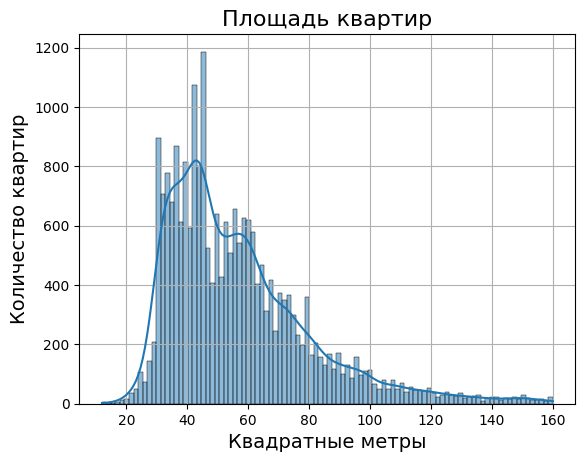

In [90]:
sns.histplot(data=data, x='total_area', kde=True, bins=100)

plt.title('Площадь квартир', fontsize=16)
plt.xlabel('Квадратные метры', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [91]:
data['total_area'].describe()

count    23055.000000
mean        56.902400
std         23.736735
min         12.000000
25%         40.000000
50%         51.100000
75%         68.000000
max        160.000000
Name: total_area, dtype: float64

Наибольшие варианты:

In [92]:
data['total_area'].sort_values(ascending=False).head(10)

13544    160.0
11439    160.0
2391     160.0
2404     160.0
8286     160.0
3817     160.0
20467    160.0
4218     160.0
19748    160.0
19654    160.0
Name: total_area, dtype: float64

**Вывод:** Большинство помещений менее 100 м². До 30 м² также очень мало.

#### Жилая площадь

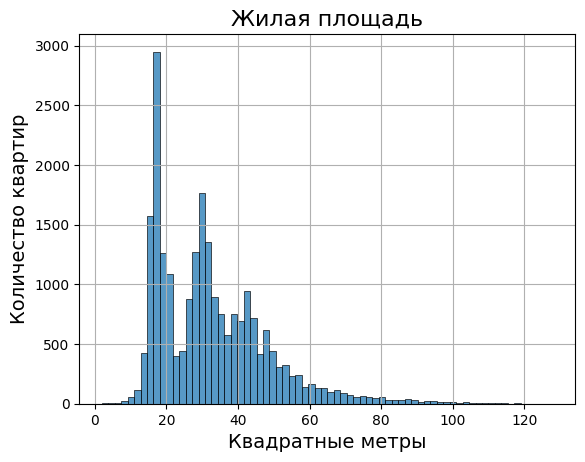

In [93]:
sns.histplot(data=data, x='living_area', bins=70)

plt.title('Жилая площадь', fontsize=16)
plt.xlabel('Квадратные метры', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [94]:
data['living_area'].describe()

count    23055.000000
mean        32.654232
std         15.791981
min          2.000000
25%         19.000000
50%         30.000000
75%         41.600000
max        128.000000
Name: living_area, dtype: float64

Наибольшие варианты:

In [95]:
data['living_area'].sort_values(ascending=False).head(10)

17762    128.0
1034     125.0
13042    122.1
11954    118.5
3451     117.4
12090    117.1
21225    115.0
14367    115.0
4188     115.0
16892    114.8
Name: living_area, dtype: float64

**Вывод:** Самые распространенные варианты жилой площади:
- от 10м² до 20м²;
- от 25м² до 33м²;
- от 40м² до 44м².

После 60 м² встречаются единичные случаи. Три пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, 2-комнатной и 3-комнатной квартиры.

#### Площадь кухни

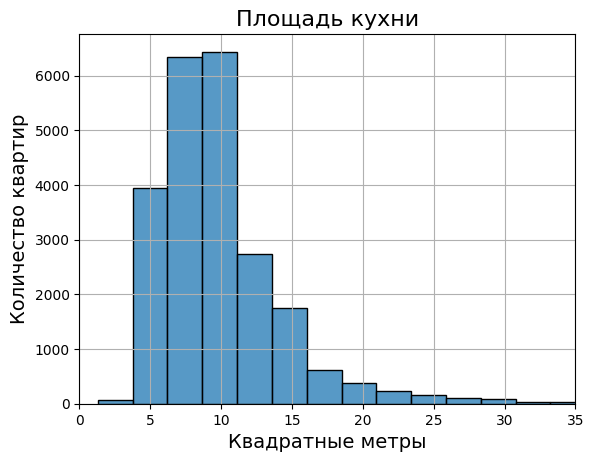

In [96]:
ax = sns.histplot(data=data, x='kitchen_area', bins=30)

ax.set_xlim(0,35)
plt.title('Площадь кухни', fontsize=16)
plt.xlabel('Квадратные метры', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [97]:
data['kitchen_area'].describe()

count    23055.000000
mean        10.134015
std          4.979267
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         75.000000
Name: kitchen_area, dtype: float64

Наибольшие варианты:

In [98]:
data['kitchen_area'].sort_values(ascending=False).head(10)

14316    75.0
22480    65.0
19071    64.0
15427    64.0
18712    63.0
14567    62.5
3467     60.0
8063     58.4
20421    58.0
4215     56.2
Name: kitchen_area, dtype: float64

**Вывод:** Самые распространённые кухни от 5 до 15 м². Больше 20 м² кухни практически не встречаются. Больше 30 м² - единичные случаи.

#### Цена объекта

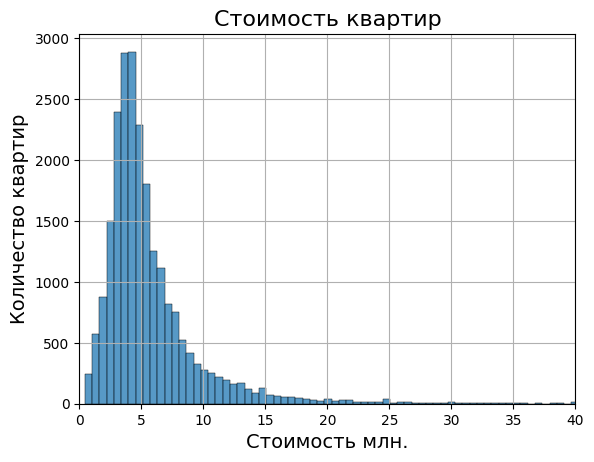

In [99]:
data['last_price_mln'] = data['last_price'] / 1000000
ax = sns.histplot(data=data, x='last_price_mln', bins=100)

ax.set_xlim(0,40)
plt.title('Стоимость квартир', fontsize=16)
plt.xlabel('Стоимость млн.', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [100]:
data['last_price_mln'].describe()

count    23055.000000
mean         5.723411
std          4.370093
min          0.430000
25%          3.400000
50%          4.599000
75%          6.550000
max         59.000000
Name: last_price_mln, dtype: float64

Наибольшие варианты:

In [101]:
data['last_price_mln'].sort_values(ascending=False).head(10)

22217    59.000
11943    59.000
13379    55.845
1891     55.800
2067     54.000
9781     53.000
16826    52.000
7379     52.000
6233     51.000
2939     50.000
Name: last_price_mln, dtype: float64

**Вывод:** В основном стоимость квартир порядка 5 миллионов. Больше 30 миллионов вариантов мало.

#### Количество комнат

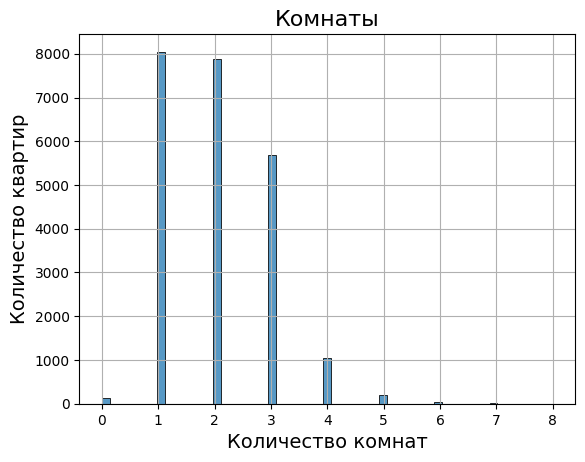

In [102]:
sns.histplot(data=data, x='rooms')

plt.title('Комнаты', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [103]:
data['rooms'].describe()

count    23055.000000
mean         2.012015
std          0.957129
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

**Вывод:** В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 5 комант уже уникальные случаи.

#### Высота потолков

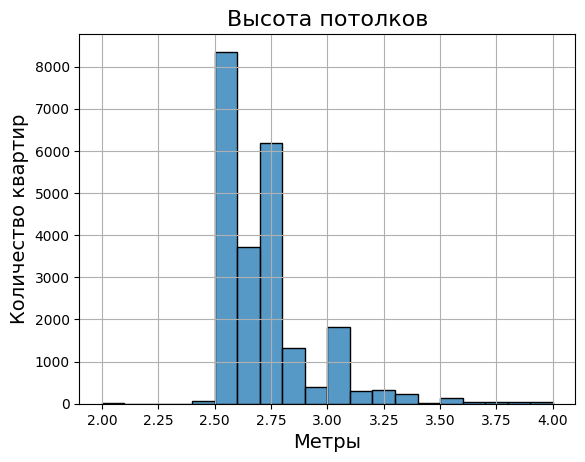

In [104]:
sns.histplot(data=data, x='ceiling_height', bins=20)

plt.title('Высота потолков', fontsize=16)
plt.xlabel('Метры', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [105]:
data['ceiling_height'].describe()

count    23055.000000
mean         2.696024
std          0.209328
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

**Вывод:** Большинство вариантов имеют высоту потолков от 2,5 до 3,2 метров. Все что больше или частные дома или ошибка в данных.

#### Этаж квартиры

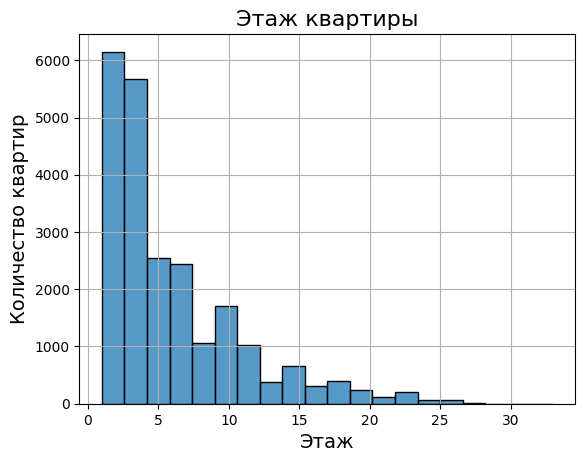

In [106]:
sns.histplot(data=data, x='floor', bins=20)

plt.title('Этаж квартиры', fontsize=16)
plt.xlabel('Этаж', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [107]:
data['floor'].describe()

count    23055.000000
mean         5.888961
std          4.882713
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Наибольшие варианты:

In [108]:
data['floor'].sort_values(ascending=False).head(10)

17816    33
11306    32
18222    31
1866     30
10825    29
389      28
7524     27
8295     27
110      27
12974    27
Name: floor, dtype: int64

**Вывод:** Большинство объявлений о продаже помещений до 4го этажа. Следующая часть с 5-го по 9й этажи. Есть небольшой пик квартир на 10м этаже.

#### Тип этажа квартиры («первый», «последний», «другой»)

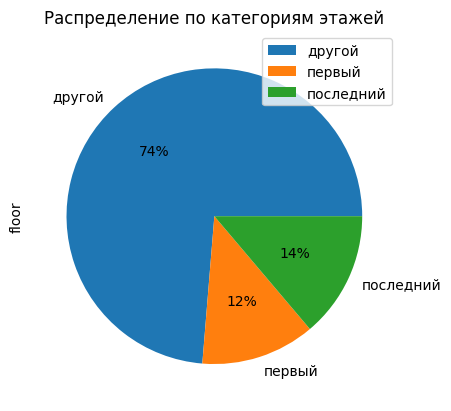

In [109]:
data.groupby('floor_category').count().plot(kind='pie', y='floor', autopct='%1.0f%%', 
                                            title='Распределение по категориям этажей');

In [110]:
data['floor_category'].value_counts()

floor_category
другой       16992
последний     3185
первый        2878
Name: count, dtype: int64

**Вывод:** Преобладающее количество объявлений (74%) не относятся к квартирам на первом или последнем этажах.

#### Общее количество этажей в доме

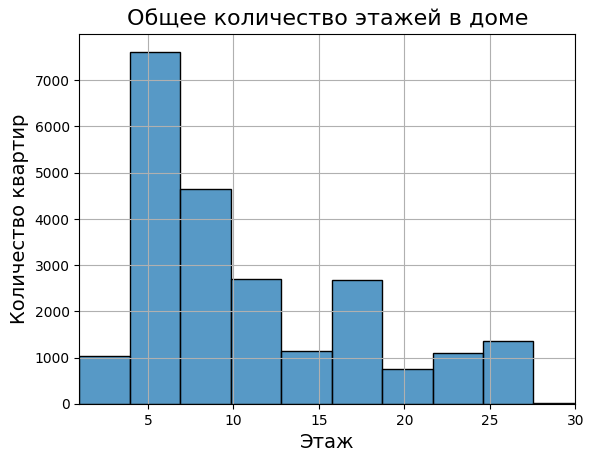

In [111]:
ax = sns.histplot(data=data, x='floors_total', bins=20)

ax.set_xlim(1,30)
plt.title('Общее количество этажей в доме', fontsize=16)
plt.xlabel('Этаж', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [112]:
data['floors_total'].describe()

count    23055.000000
mean        10.743830
std          6.610995
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Наибольшие варианты:

In [113]:
data['floors_total'].sort_values(ascending=False).head(10)

2194     60
16358    52
10825    36
5668     36
389      36
1027     35
20486    35
9356     35
21344    35
8295     35
Name: floors_total, dtype: int32

**Вывод:** Имеется 2 пика на графике. Предполагаю. что это 5-ти и 9-ти этажные дома, которые строились по всей России. Стоит отметить, что в центре Санкт-Петербурга запрещено строительство домов выше 5-го этажа. Отсюда и такое количество 5-ти этажек.

#### Расстояние до центра города в метрах

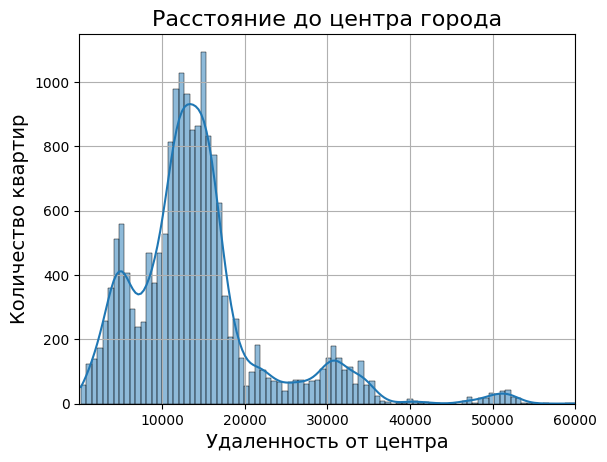

In [114]:
ax = sns.histplot(data=data, x='cityCenters_nearest', kde=True, bins=100)

ax.set_xlim(1,60000)
plt.title('Расстояние до центра города', fontsize=16)
plt.xlabel('Удаленность от центра', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [115]:
data['cityCenters_nearest'].describe()

count    17574.000000
mean     14382.374189
std       8571.908821
min        181.000000
25%       9626.000000
50%      13222.000000
75%      16381.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Наибольшие варианты:

In [116]:
data['cityCenters_nearest'].sort_values(ascending=False).head(10)

9416     65968.0
5216     65952.0
564      65764.0
20302    65105.0
5096     64857.0
18470    62706.0
2897     62454.0
16202    61495.0
22621    60223.0
4333     59626.0
Name: cityCenters_nearest, dtype: float64

**Вывод:** Имеет 3 пика:
- около 5000 метров;
- около 12000 метров;
- около 15000 метров;

Первый пик захватывает исторический центр города, Васильевский остров и Петроградскую стороную. Второй пик охватывает все в пределах КАД на юге и востоке. Третий - захватывает оставшуюся на севере территорию в пределах КАД.

#### Расстояние до ближайшего аэропорта

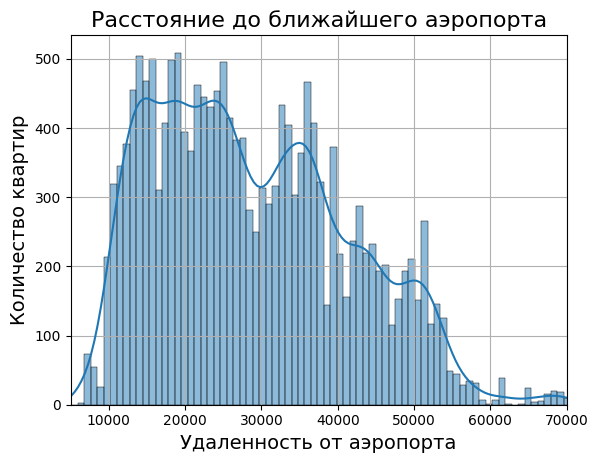

In [117]:
ax = sns.histplot(data=data, x='airports_nearest', kde=True, bins=100)

ax.set_xlim(5000,70000)
plt.title('Расстояние до ближайшего аэропорта', fontsize=16)
plt.xlabel('Удаленность от аэропорта', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [118]:
data['airports_nearest'].describe()

count    17554.000000
mean     28844.704227
std      12725.325474
min          0.000000
25%      18446.000000
50%      26902.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Наибольшие варианты:

In [119]:
data['airports_nearest'].sort_values(ascending=False).head(10)

9416     84869.0
5216     84853.0
564      84665.0
20302    84006.0
5096     83758.0
18470    81607.0
2897     81355.0
4333     78527.0
908      75646.0
368      73827.0
Name: airports_nearest, dtype: float64

**Вывод:** Вблизи Санкт-Петербурга находится 3 аэродрома: Пулково, Ржевка и военная база в Левашово. Гражданским аэропортом считается только Пулково, который находится 15 км. от центра города в южном направлении.

Медиана указана в 26.8 км. от аэропорта, что включает в себя сам Санкт-Петербург до северной границы КАДа. а также крупные города/поселки такие как Шушары, Пушкин, Павловск и др. Стоит отметить, что данные территории все еще считаются официально территорией Санкт-Петербурга.

#### Расстояние до ближайшего парка

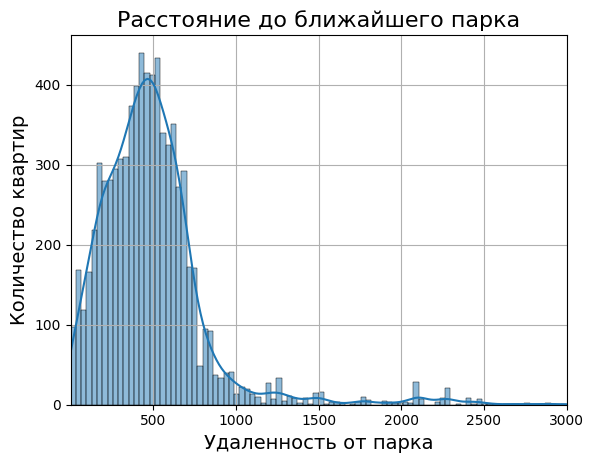

In [120]:
ax = sns.histplot(data=data, x='parks_nearest', kde=True, bins=100)

ax.set_xlim(1,3000)
plt.title('Расстояние до ближайшего парка', fontsize=16)
plt.xlabel('Удаленность от парка', fontsize=14)
plt.ylabel('Количество квартир', fontsize=14)
plt.grid(True)

plt.show()

In [121]:
data['parks_nearest'].describe()

count    7696.000000
mean      493.108628
std       342.141974
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Наибольшие варианты:

In [122]:
data['parks_nearest'].sort_values(ascending=False).head(10)

10705    3190.0
19002    3190.0
1546     3064.0
22579    2984.0
2589     2905.0
1809     2888.0
7665     2880.0
3767     2847.0
21531    2768.0
7144     2747.0
Name: parks_nearest, dtype: float64

**Вывод:** Большинство построек находтся в 800 метрах от парка, остальные случаи единичные. Пик приходится на 500 метров. Это объясняется тем, что люди могут не знать, что на расстоянии более 1000 метров от них находится парк, т.к. банально не гуляли в его сторону.

#### День и месяц публикации объявления

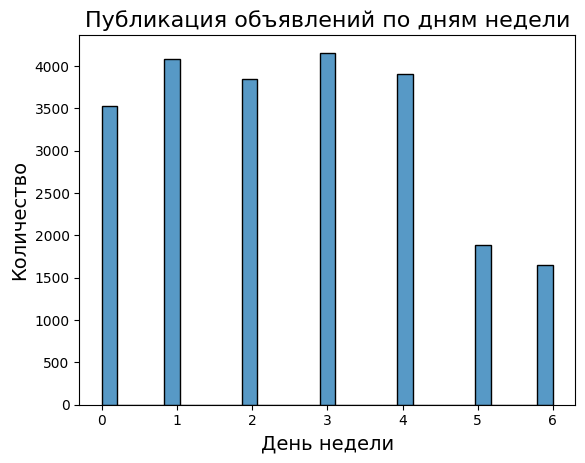

In [123]:
sns.histplot(data=data, x='weekday_exposition')

plt.title('Публикация объявлений по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()

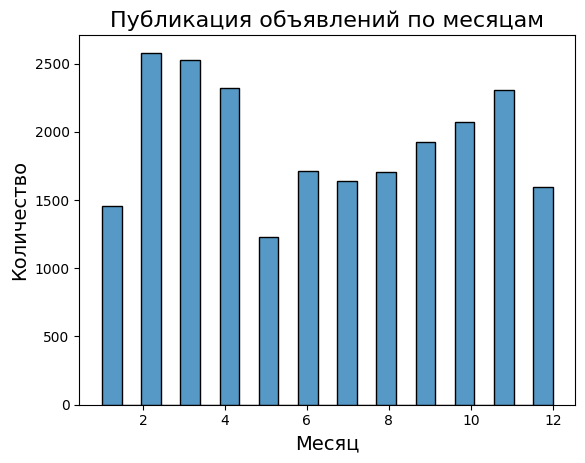

In [124]:
sns.histplot(data=data, x='month_exposition')

plt.title('Публикация объявлений по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()

**Вывод:** В распределении по дням недели видно, что в основном объявления выкладывались по будням. На выходных объявлений было выложено в 2 раза меньше.

На месячном графике можно выделить следующую сезонность:
- январь: скорее всего это связано с новогодними праздниками, люди отдыхают, пытаются вспомнить как работать и им не до решения таких глобальных вопросов как продажа квартиры;
- февраль-апрель: лидеры по числу объявлений, особых праздников нет, да и не самые популярные месяца для отпусков;
- май: майские праздники, приближение лета;
- июнь-август: небольшое "плато" по объявлениям, люди на отдыхе/даче и т.д. и т.п.;
- сентябрь-ноябрь: повышение количества объявлений, опять же, не самые популярные месяца для отпусков. Плюс нужно успеть сделать все до конца года, поэтому количество объявлений увеличивается к ноябрю;
- декабрь: новый год приближается, что не успели, сделается в следующем году.

В целом график напоминает ситуацию на рынке труда: январь, май и декабрь самые непопулярные месяца для поиска новой работы.

### Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

Прежде чем начать выполнять это задание сделаем предположение, что дата снятия объявления может не считаться датой продажи.

In [125]:
data['days_exposition'].describe()

count       20006.0
mean     178.582375
std      217.501516
min             1.0
25%            44.0
50%            94.0
75%           228.0
max          1580.0
Name: days_exposition, dtype: Float64

Среднее время размещения объявления составляет 178 дней, медиана - 94. Нормальным временем продажи квартиры можно считать от 44 до 228 дней. Быстрым - до 45 дней, слишком долгим - от 229 дней. Посмотрим что покажем гистограмма:

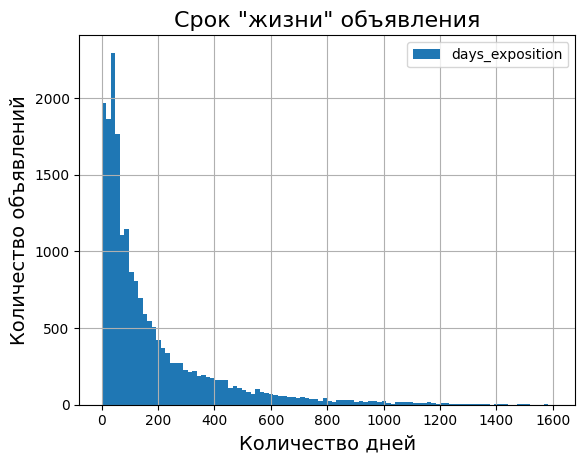

In [126]:
data.plot(y='days_exposition', kind='hist', bins=100, range=(1, 1600))

plt.title('Срок "жизни" объявления', fontsize=16)
plt.xlabel('Количество дней', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.grid(True)

plt.show()

Судя по гистограмме у нас распределение Пуассона. Имеются выбросы рассмотрим их подробнее:

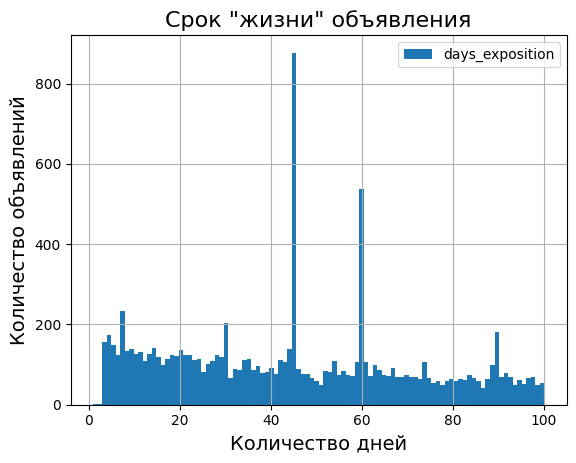

In [127]:
data.plot(y='days_exposition', kind='hist', bins=100, range=(1, 100))

plt.title('Срок "жизни" объявления', fontsize=16)
plt.xlabel('Количество дней', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.grid(True)

plt.show()

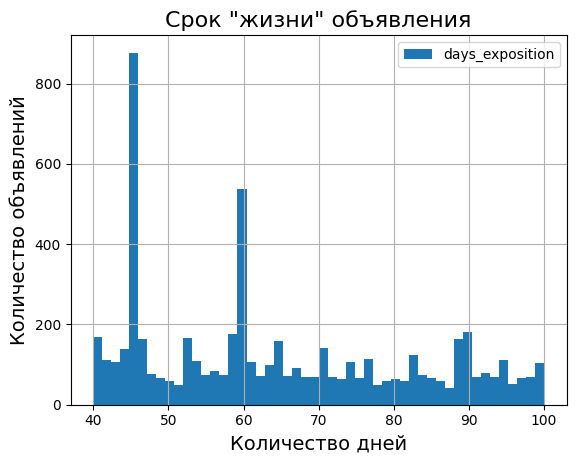

In [128]:
data.plot(y='days_exposition', kind='hist', bins=50, range=(40, 100))

plt.title('Срок "жизни" объявления', fontsize=16)
plt.xlabel('Количество дней', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.grid(True)

plt.show()

Имеются выбросы в 45, 60 и 90 дней. Согласно правилам размещения Яндекс Недвижимость https://yandex.ru/support/realty/owner/home/add-ads-housing.html в эти сроки снимаются объявления с площадки. При этом в самом Санкт-Петербурге срок размещения объявления составляет 365 дней. Возникает вопрос являлся ли срок размещения для Санкт-Петербурга актуальным ранее, или придерживались правил для всех объявлений. Это необходимо уточнить у сотрудников, что предоставляли данные. Посмотрим на данные без учета этих пиков:

In [129]:
good_data = data.query('days_exposition != 0 and days_exposition != 45 and \
                       days_exposition != 60 and days_exposition != 90')

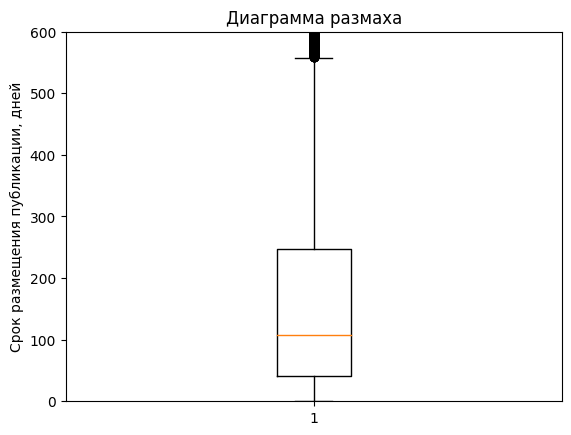

In [130]:
plt.boxplot(good_data['days_exposition'])
plt.title('Диаграмма размаха')
plt.ylim(0, 600)
plt.ylabel('Срок размещения публикации, дней')
plt.show()

Все значения выше 600 можно считать как аномальные. Посмотрим на гистограмму:

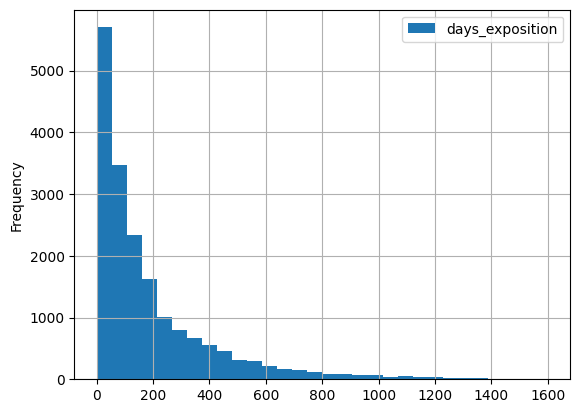

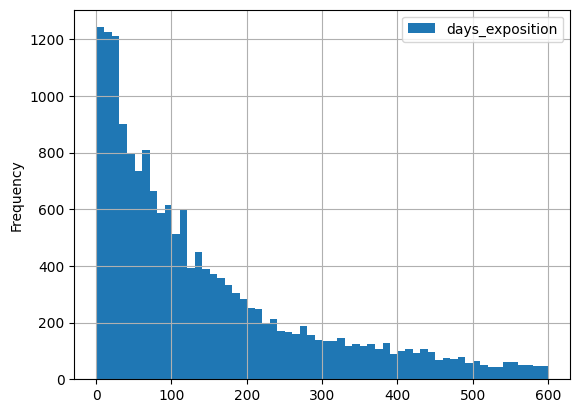

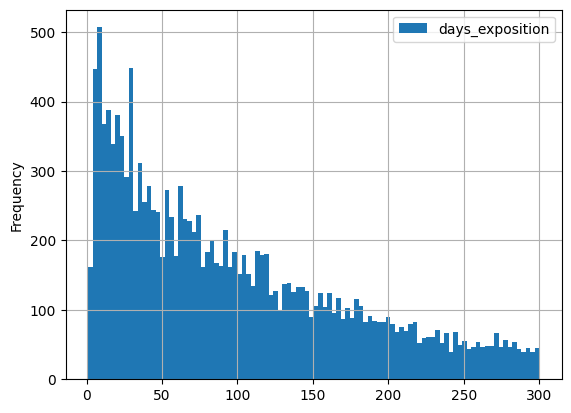

In [131]:
good_data.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1,1600));
good_data.plot(y='days_exposition', kind='hist', bins=60, grid=True, range=(1,600));
good_data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,300));

Избавились от явных пиков. Посмотрим как изменились среднее и медиана, а также на самые высокие аномальные значения.

In [132]:
good_data['days_exposition'].describe()

count       18410.0
mean       189.2805
std      223.508267
min             1.0
25%            41.0
50%           108.0
75%           248.0
max          1580.0
Name: days_exposition, dtype: Float64

Медиана времени продажи составляет 108 дней.

Среднее время продажи - 189 день.

In [133]:
data['days_exposition'].sort_values(ascending=False).head(10)

18431    1580
1075     1572
9332     1553
1834     1513
6530     1512
20516    1512
13776    1497
14970    1489
18705    1485
11680    1484
Name: days_exposition, dtype: Int64

**Вывод:** Учитывать данные с 45, 60 и 90 днями мы не можем, т.к. эти объявления, скорее всего, были сняты по правилам площадки. Стоить отметить, что нормальным сроком продажи квартиры считается от 41 до 248 дней. Продажи быстрее 41 дня можно считать быстрыми, в то время как больше 248 дней - долгими. Имеются также аномально долгие объявления от 600 до 1580 дней.

### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

#### Изучим зависимость цены от общей площади

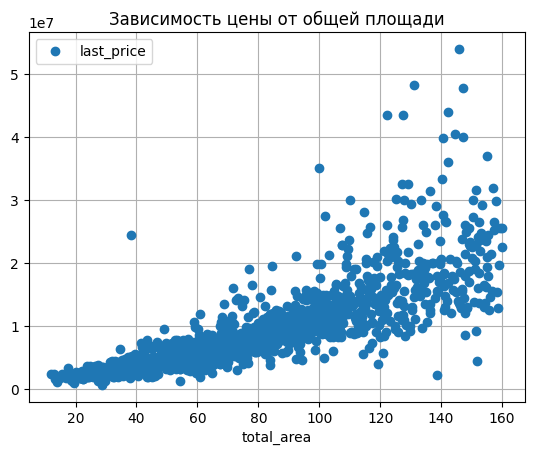

In [134]:
data.pivot_table(index='total_area', values='last_price')\
.plot(grid=True, style='o', title='Зависимость цены от общей площади');

Корреляция цены и общей площади:

In [135]:
data['total_area'].corr(data['last_price'])

0.7365708230404864

**Вывод:** Корреляция выше средней 0,74. Значит чем выше площадь продаваемой квартиры, тем выше ее цена.

#### Изучим зависимость цены от жилой площади

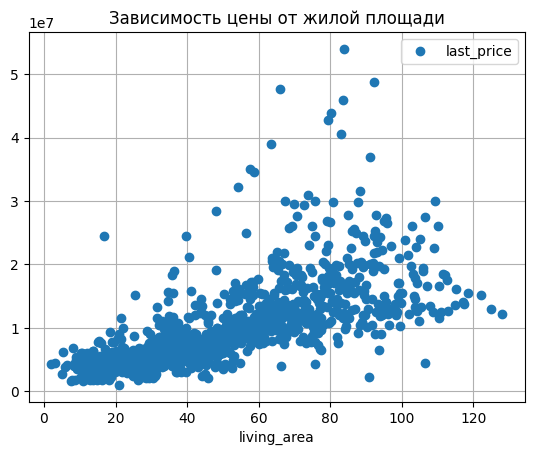

In [136]:
data.pivot_table(index='living_area', values='last_price')\
.plot(grid=True, style='o', title='Зависимость цены от жилой площади');

Корреляция цены и жилой площади:

In [137]:
data['living_area'].corr(data['last_price'])

0.6226921275322712

**Вывод:** По сравнению с корреляцией общей площади, корреляция жилой площади чуть ниже - 0,62.

#### Изучим зависимость цены от площади кухни

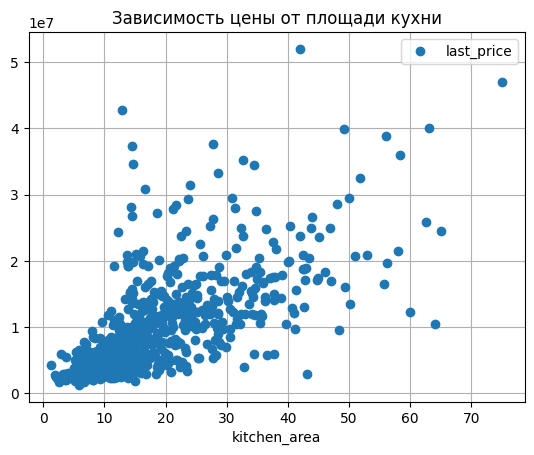

In [138]:
data.pivot_table(index='kitchen_area', values='last_price')\
.plot(grid=True, style='o', title='Зависимость цены от площади кухни');

Корреляция цены и площади кухни:

In [139]:
data['kitchen_area'].corr(data['last_price'])

0.5884009044446851

**Вывод:** Корреляция составляет 0,59

#### Изучим зависимость цены от количества комнат

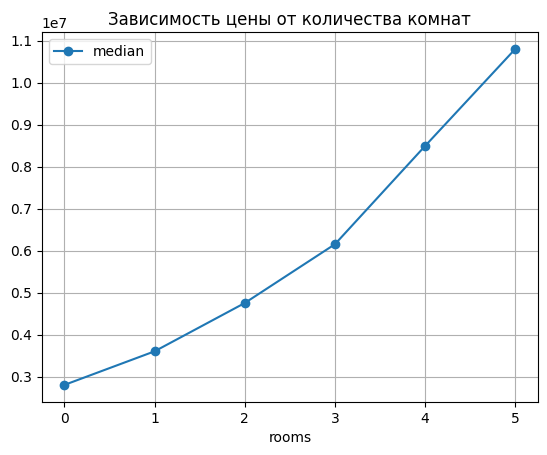

In [140]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', 
                                     aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median', grid=True, style='o-', 
                                           title='Зависимость цены от количества комнат');

Корреляция цены и количества комнат:

In [141]:
data['rooms'].corr(data['last_price'])

0.4337113269871579

**Вывод:** Корреляция невысокая, всего 0,43. Стоит отметить, что увеличение количества комнат увеличивает влияние на итоговую стоимость квартиры.

#### Изучим зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)

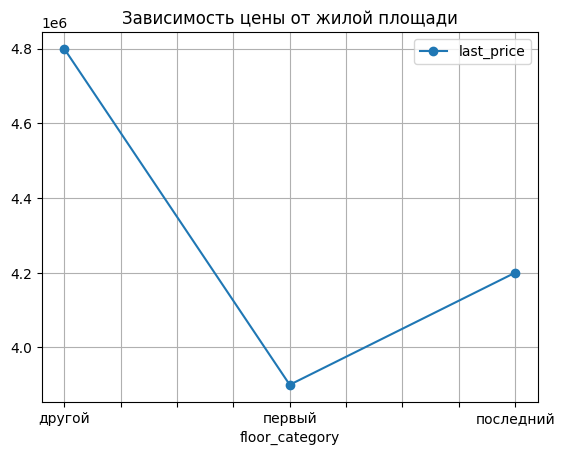

In [142]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median')\
.plot(grid=True, style='o-', title='Зависимость цены от жилой площади');

In [143]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', 
                                              aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category

,mean,count,median
floor_category,,,
другой,5.999648e+06,16992,4799250
первый,4.530297e+06,2878,3900000
последний,5.327798e+06,3185,4200000


**Вывод:** Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

#### Изучим зависимость цены от даты размещения (день недели, месяц, год)

In [144]:
pivot_table_days_exposition = (
    data.pivot_table(index=['year_exposition', 'month_exposition', 'weekday_exposition'], 
                     values='last_price', aggfunc='median')
)
pivot_table_days_exposition

last_price
year_exposition month_exposition weekday_exposition            
2014            11               3                   13280560.0
                                 5                    5500000.0
                12               0                    4850000.0
                                 1                   10700000.0
                                 2                    5660000.0
...                                                         ...
2019            4                5                    4400000.0
                                 6                    4700000.0
                5                2                    5750000.0
                                 3                    4175000.0
                                 4                    4475000.0

[376 rows x 1 columns]

Рассмотрим каждую зависимотсть по отдельности

##### День недели

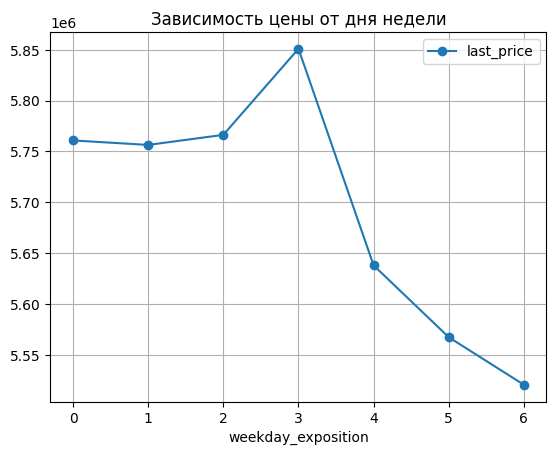

In [145]:
data.pivot_table(index='weekday_exposition', values='last_price')\
.plot(grid=True, style='o-', title='Зависимость цены от дня недели');

**Вывод:** Дороже всего квартиры, опубликованные в четверг, дешевле всего - в воскресенье. Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.

##### Месяц

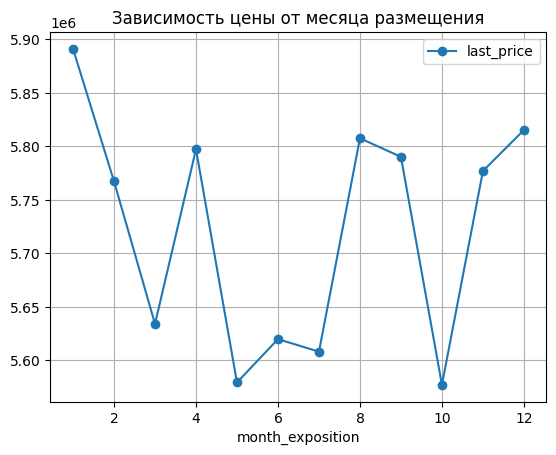

In [146]:
data.pivot_table(index='month_exposition', values='last_price')\
.plot(grid=True, style='o-', title='Зависимость цены от месяца размещения');

**Вывод:** Самая высокая стоимость квартиры в январе, апреле, сентябре и декабре. Самая низкая - май, июнь, июль и октябрь. Возможно связанно это с сезонностью на рынке недвижимости и отпусками людей. Еще вариант - с количеством предложений.

##### Год

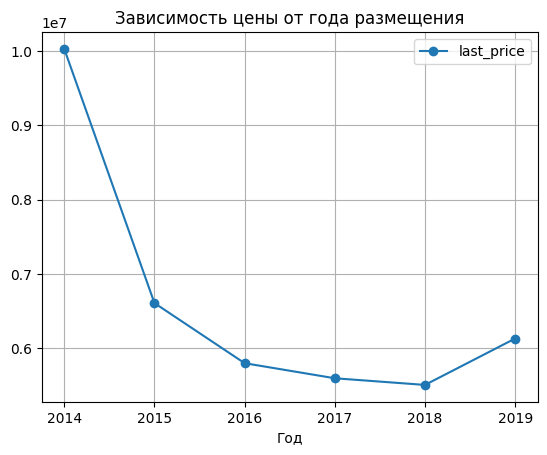

In [147]:
data.pivot_table(index='year_exposition', values='last_price')\
.plot(grid=True, style='o-', title='Зависимость цены от года размещения', xlabel=('Год'));

**Вывод:** С 2014 до 2018 года цена упала почти в 2 раза. Особенно сильное падение с 2014 до 2016 года. С 2018 цена начала увеличиваться. Возможно связано с событиями 2014 года и введением санкций в отношении России.

**Общий вывод:** Проанализировали зависимость цены от следующий параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Больше всего на стоимость квартиры влияет общая площадь (корреляция 0,74), далее жилая площадь (0,62), площадь кухни (0,59) и количество комнат (0,43). *При анализе влияния количества комнат, мы не брали в учет то количество комнат, если количество объявлений в датасете не превышает 50.*

Самые дешевые квартиры оказались на первом этаже, чуть дороже на последнем, между ними оказались самыми дорогими.

Влияние даты размещения на стоимость квартиры также присутствует:
- четверг оказался самым "дорогим" днем, а воскресенье самым "дешевым";
- наблюдается сезонность на рынке недвижимости в течение года;
- глобальные кризисы также имеют влияние на стомость квартир. С 2014 до 2018 цена на квартиры уменьшилась почти в 2 раза.

In [148]:
pairplot_data = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]

C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


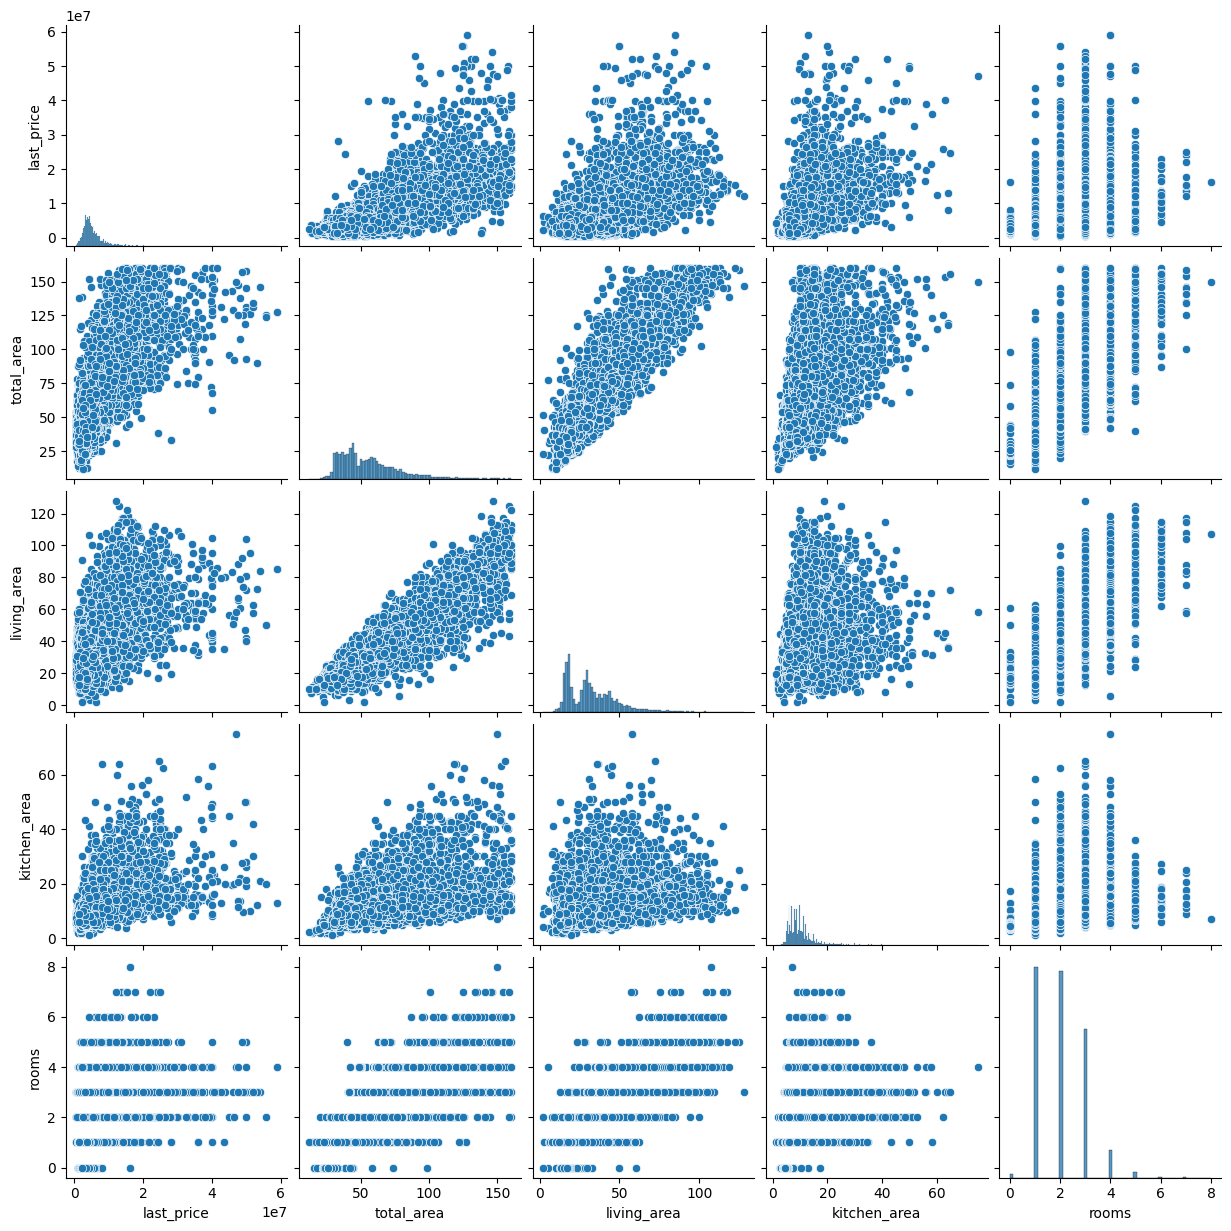

In [149]:
sns.pairplot(pairplot_data);

### Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."

In [150]:
top_ten_city = data['locality_name'].value_counts().head(10)
top_ten_city

locality_name
Санкт-Петербург      15178
поселок Мурино         552
поселок Шушары         439
Всеволожск             397
Пушкин                 361
Колпино                337
поселок Парголово      326
Гатчина                307
деревня Кудрово        299
Выборг                 234
Name: count, dtype: int64

In [151]:
t_t_city_sm_price = (
    data.query('locality_name in (@top_ten_city.index)')
    .pivot_table(values='price_per_sqm', index='locality_name', aggfunc=['count', 'median'])
    .astype(int).reset_index())
t_t_city_sm_price.columns = ['Название локации', 'Кол-во объявлений', 'Медиана стоимости м²']
t_t_city_sm_price = t_t_city_sm_price.sort_values('Медиана стоимости м²', ascending=False).reset_index(drop=True)
t_t_city_sm_price

,Название локации,Кол-во объявлений,Медиана стоимости м²
0,Санкт-Петербург,15178,104444
1,Пушкин,361,99744
2,деревня Кудрово,299,91860
3,поселок Парголово,326,91780
4,поселок Мурино,552,86059
5,поселок Шушары,439,76829
6,Колпино,337,74722
7,Гатчина,307,67796
8,Всеволожск,397,65789
9,Выборг,234,58133


Населенный пункт с самой высокой стоимостью квадратного метра:

In [152]:
t_t_city_sm_price[t_t_city_sm_price['Медиана стоимости м²'] == t_t_city_sm_price['Медиана стоимости м²'].max()]

,Название локации,Кол-во объявлений,Медиана стоимости м²
0,Санкт-Петербург,15178,104444


Населенный пункт с самой низкой стоимостью квадратного метра:

In [153]:
t_t_city_sm_price[t_t_city_sm_price['Медиана стоимости м²'] == t_t_city_sm_price['Медиана стоимости м²'].min()]

,Название локации,Кол-во объявлений,Медиана стоимости м²
9,Выборг,234,58133


**Общий вывод:** Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идут территории, который официально входят в состав Санкт-Петербурга.

Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

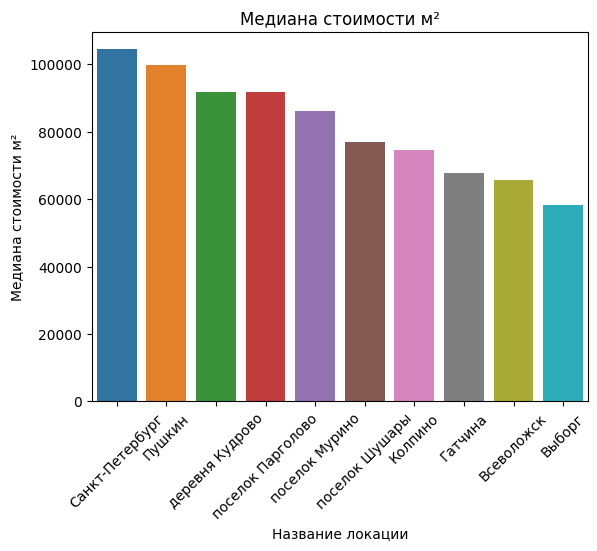

In [154]:
sns.barplot(t_t_city_sm_price, x = 'Название локации', y = 'Медиана стоимости м²')

plt.xticks(rotation=45)
plt.title('Медиана стоимости м²')

plt.show()

### Задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

Посчитаем рассточния до центра в километрах, а отсутствующие значения заменим на *999999*:

In [155]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(value=999999).astype(int)

Посмотроим график, где указана средняя стоимость для каждого км. в Санкт-Петербурге:

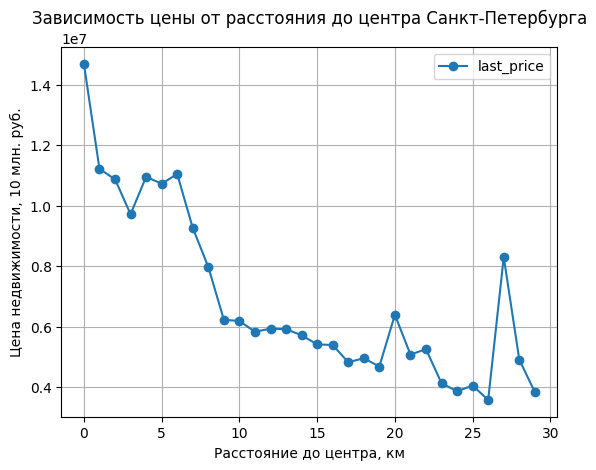

In [156]:
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 999999')\
.pivot_table(index='cityCenters_nearest_km', values='last_price')\
.plot(grid=True, style='o-', title=('Зависимость цены от расстояния до центра Санкт-Петербурга'),\
         xlabel=('Расстояние до центра, км'), ylabel=('Цена недвижимости, 10 млн. руб.'));

И посмотрим на данные в формате сводной таблицы:

In [157]:
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km != 999999')\
.pivot_table(index='cityCenters_nearest_km', values='last_price')

,last_price
cityCenters_nearest_km,
0,1.468889e+07
1,1.121873e+07
2,1.087267e+07
3,9.718639e+06
4,1.095331e+07
5,1.072689e+07
6,1.104554e+07
7,9.262920e+06
8,7.972043e+06


**Общий вывод:** Самые дорогие квартиры находятся в пределах 3х км. от центра города. После 7 км. идет резкое снижение стоимости квартиры. Стоимость квартиры в центре прежде всего обусловлена исторической значимостью центра Санкт-Петербурга.

## Общий вывод

Обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. 

**Срок продажи квартиры:**
- чаще всего квартиру продают за 108 дней. Если меньше 41 дня, то это быстро, если дольше 248 дней - это долго;
- есть большое число квартир, проданных всего за несколько дней после публикации;
- есть варианты, которые продавались несколько десятков месяцев.

**Факторы, влияющие на стоимость:**
- от общей площади корреляция составляет 0,74;
- от жилой площади - 0,63;
- от площади кухни - 0,59;
- от количества комнат - 0,43;
- от типа этажа, на котором расположена квартира (первый, последний, другой): самым "дешевым" оказался первый этаж, чуть дороже "последний", стоимость остальных этажей оценивается выше;
- от даты размещения (день недели, месяц, год): суббота оказалась самым "дорогим" днем, а воскресенье самым "дешевым"; наблюдается сезонность на рынке недвижимости в течение года; глобальные кризисы также имеют влияние на стомость квартир. С 2014 до 2018 цена на квартиры уменьшивась в 2 раза.

**Стоимость квадратного метра в топ-10 населённых пунктов:**
- дороже всего квадратный метр в Санкт-Петербурге - 104444 руб.;
- дешевле всего квадратный метр в Выборге - 58133 руб.

**Средняя цена каждого километра от центра Санкт-Петербурга:**
- самые дорогие квартиры находятся в пределах 3х км. от центра города;
- после 7 км. идет резкое снижение стоимости квартиры.